In [108]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
#!pip install librosa

    100% |████████████████████████████████| 1.6MB 23.4MB/s eta 0:00:01
    100% |████████████████████████████████| 286kB 44.2MB/s ta 0:00:01
    100% |████████████████████████████████| 327kB 47.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/ce/49/68/87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
fastai 1.0.42 requires nvidia-ml-py3, which is not installed.
jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.7 which i

In [109]:
from pathlib import Path
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from utils import read_file, transform_path

In [110]:
path = Path('data/Traffic Assitance/audio_detection/')

In [111]:
path.ls()

[]

In [69]:
# these folders must be in place
siren_audio = path/'siren'
no_siren_audio=path/'no_siren'

siren_images = path/'siren_images'
no_siren_images=path/'no_siren_images'


In [82]:
siren_fnames = [f.name for f in siren_audio.iterdir()]
no_siren_fnames = [f.name for f in no_siren_audio.iterdir()]

In [74]:
no_siren_fnames

['2019-02-16-22_04_39.wav',
 '2019-02-16-22_21_32.wav',
 '2019-02-16-22_23_16.wav',
 '2019-02-16-22_14_59.wav',
 '2019-02-16-22_13_04.wav',
 '2019-02-16-22_26_04.wav',
 '2019-02-16-22_08_29.wav',
 '2019-02-16-22_24_55.wav',
 '2019-02-16-22_22_37.wav',
 '2019-02-16-22_14_34.wav',
 '2019-02-16-22_33_13.wav',
 '2019-02-16-22_04_50.wav',
 '2019-02-16-22_05_11.wav',
 '2019-02-16-22_25_10.wav',
 '2019-02-16-22_31_16.wav',
 '2019-02-16-22_11_43.wav',
 '2019-02-16-22_20_23.wav',
 '2019-02-16-22_15_53.wav',
 '2019-02-16-22_28_26.wav',
 '2019-02-16-22_18_51.wav',
 '2019-02-16-22_08_03.wav',
 '2019-02-16-22_04_00.wav',
 '2019-02-16-22_17_40.wav',
 '2019-02-16-22_32_49.wav',
 '2019-02-16-22_28_30.wav',
 '2019-02-16-22_19_33.wav',
 '2019-02-16-22_23_09.wav',
 '2019-02-16-22_23_02.wav',
 '2019-02-16-22_22_15.wav',
 '2019-02-16-22_01_13.wav',
 '2019-02-16-22_25_06.wav',
 '2019-02-16-22_04_24.wav',
 '2019-02-16-22_20_08.wav',
 '2019-02-16-22_13_00.wav',
 '2019-02-16-22_21_06.wav',
 '2019-02-16-22_15_0

In [75]:
fn = siren_fnames[0]

In [76]:

Audio(str(siren_audio/fn))

In [77]:

def log_mel_spec_tfm(fname, src_path, dst_path):
    x, sample_rate = read_file(fname, src_path)
    
    n_fft = 1024
    hop_length = 256
    n_mels = 40
    fmin = 20
    fmax = sample_rate / 2 
    
    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft, 
                                                    hop_length=hop_length, 
                                                    n_mels=n_mels, power=2.0, 
                                                    fmin=fmin, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    dst_fname = dst_path / (fname[:-4] + '.png')
    plt.imsave(dst_fname, mel_spec_db)

In [78]:

x, sr = read_file(fn,siren_audio )
x.shape, sr, x.dtype

((94815,), 44100, dtype('float32'))

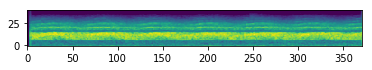

In [79]:
log_mel_spec_tfm(fn, siren_audio, Path('.'))
img = plt.imread(fn[:-4] + '.png')
plt.imshow(img, origin='lower');

In [83]:
# TRAIN files took 10m43s
#transform_path(siren_audio, siren_images, log_mel_spec_tfm,fnames=siren_fnames, delete=True)
transform_path(no_siren_audio, no_siren_images, log_mel_spec_tfm,fnames=no_siren_fnames, delete=True)

In [84]:
from fastai.vision import *


In [85]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,size=224, num_workers=4).normalize(imagenet_stats)

In [86]:
data


ImageDataBunch;

Train: LabelList
y: CategoryList (848 items)
[Category no_siren_images, Category no_siren_images, Category no_siren_images, Category no_siren_images, Category no_siren_images]...
Path: data/Traffic Assitance/models
x: ImageItemList (848 items)
[Image (3, 40, 409), Image (3, 40, 410), Image (3, 40, 378), Image (3, 40, 376), Image (3, 40, 414)]...
Path: data/Traffic Assitance/models;

Valid: LabelList
y: CategoryList (212 items)
[Category siren_images, Category no_siren_images, Category no_siren_images, Category siren_images, Category siren_images]...
Path: data/Traffic Assitance/models
x: ImageItemList (212 items)
[Image (3, 40, 374), Image (3, 40, 376), Image (3, 40, 410), Image (3, 40, 400), Image (3, 40, 412)]...
Path: data/Traffic Assitance/models;

Test: None

In [87]:
data.classes

['no_siren_images', 'siren_images']

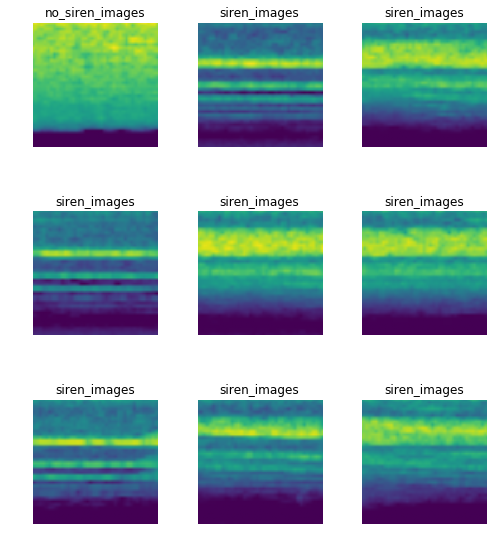

In [88]:
data.show_batch(rows=3, figsize=(7,8))

In [89]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['no_siren_images', 'siren_images'], 2, 848, 212)

In [90]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [91]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.305762,0.012145,0.000000
2,0.133717,0.022619,0.004717
3,0.077243,0.005644,0.000000
4,0.050037,0.003556,0.000000


In [92]:
interp = ClassificationInterpretation.from_learner(learn)

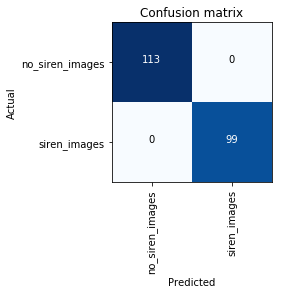

In [93]:
interp.plot_confusion_matrix()

In [94]:
learn.save('Siren_stage-1')

In [95]:
learn.export(fname="siren.pkl")

In [100]:
samples=Path('data/Traffic Assitance/')

In [101]:
samples"/recor"

PosixPath('data/Traffic Assitance')

In [105]:
test ="/recording2.wav"

In [106]:

Audio(str(samples/test))

In [107]:
transform_path(samples, samples, log_mel_spec_tfm,fnames=test, delete=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Traffic Assitance/e'